# MLS approximation in 1d


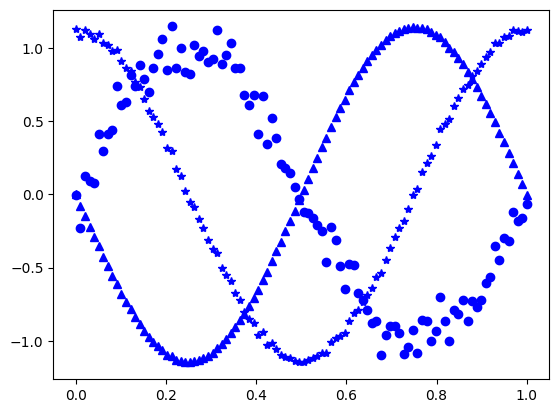

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.ioff()  # Turn off interactive plotting

coords = np.linspace(0, 1, 100)
random_noise = np.random.normal(0, 0.1, coords.shape)
data = np.sin(2 * np.pi * coords) + random_noise
Ddata_Dx = 2 * np.pi * np.cos(2 * np.pi * coords) + random_noise
Ddata_Dxx = - (2 * np.pi) **2 * np.sin(2 * np.pi * coords) + random_noise

# normmalize data
ratio_dx = max(np.abs(data.max()), np.abs(data.min())) / max(np.abs(Ddata_Dx.max()), np.abs(Ddata_Dx.min()))
Ddata_Dx *= ratio_dx
ratio_dxx = max(np.abs(data.max()), np.abs(data.min())) / max(np.abs(Ddata_Dxx.max()), np.abs(Ddata_Dxx.min()))
Ddata_Dxx *= ratio_dxx

plt.plot(coords, data, "o", color="blue")
plt.plot(coords, Ddata_Dx, "*", color="blue")
plt.plot(coords, Ddata_Dxx, "^", color="blue")
plt.show()

In [2]:
fig, axs = plt.subplots(3, 2, layout="constrained", figsize=(10, 12))


def plot_on_axis(
    ax,
    coords_approx,
    data1,
    data2,
    title,
    *,
    start = 1, 
    stop = None
):
    (
        data_deg_1,
        data_deg_1_dx,
        data_deg_1_dxx,
        error_1,
        error_1_dx,
        error_1_dxx,
    ) = data1

    (
        data_deg_2,
        data_deg_2_dx,
        data_deg_2_dxx,
        error_2,
        error_2_dx,
        error_2_dxx,
    ) = data2

    stop = -start if stop is None else stop
    
    ax.set_title(title)
    ax.plot(coords[start:stop], data[start:stop], "o", color="black")
    ax.plot(coords[start:stop], Ddata_Dx[start:stop], "*", color="darkgrey")
    ax.plot(coords[start:stop], Ddata_Dxx[start:stop], "^", color="lightgrey")

    ax.plot(
        coords_approx[start:stop],
        data_deg_1[start:stop],
        "ro-",
        label=f"deg=1, e={error_1:.2f}",
        markersize=4,
    )
    ax.plot(
        coords_approx[start:stop],
        data_deg_1_dx[start:stop],
        "ro--",
        label=f"deg=1, e={error_1_dx:.2f}",
        markersize=4,
    )
    ax.plot(
        coords_approx[start:stop],
        data_deg_1_dxx[start:stop],
        "ro-.",
        label=f"deg=1, e={error_1_dxx:.2f}",
        markersize=4,
    )

    ax.plot(
        coords_approx[start:stop],
        data_deg_2[start:stop],
        "go-",
        label=f"deg=2, e={error_2:.2f}",
        markersize=4,
    )
    ax.plot(
        coords_approx[start:stop],
        data_deg_2_dx[start:stop],
        "go--",
        label=f"deg=2, e={error_2_dx:.2f}",
        markersize=4,
    )
    ax.plot(
        coords_approx[start:stop],
        data_deg_2_dxx[start:stop],
        "go-.",
        label=f"deg=2, e={error_2_dxx:.2f}",
        markersize=4,
    )

    ax.legend()

In [3]:
from typing import Callable
from sigmaepsilon.math.approx import moving_least_squares

coords_approx = np.linspace(0, 1, 16)


def approximate(appriximator: Callable):
    data_approx = [appriximator(x)[0][0] for x in coords_approx]
    Ddata_Dx_approx = [appriximator(x)[1][0] for x in coords_approx]
    Ddata_Dxx_approx = [appriximator(x)[2][0] for x in coords_approx]
    _control_data = [appriximator(x)[0][0] for x in coords]
    _control_data_dx = [appriximator(x)[1][0] for x in coords]
    _control_data_dxx = [appriximator(x)[2][0] for x in coords]
    error = np.sum((_control_data - data)**2)
    error_dx = np.sum((_control_data_dx - Ddata_Dx)**2)
    error_dxx = np.sum((_control_data_dxx - Ddata_Dxx)**2)
    Ddata_Dx_approx = [d*ratio_dx for d in Ddata_Dx_approx]
    Ddata_Dxx_approx = [d*ratio_dxx for d in Ddata_Dxx_approx]
    return  data_approx, Ddata_Dx_approx, Ddata_Dxx_approx, error, error_dx, error_dxx

## Constant Weight Function

In [4]:
from sigmaepsilon.math.approx import ConstantWeightFunction

In [5]:
w = ConstantWeightFunction(value=1, dim=1)

approx = moving_least_squares(coords, data, deg=1, order=2, w=w)
data1 = approximate(approx)

approx = moving_least_squares(coords, data, deg=2, order=2, w=w)
data2 = approximate(approx)

plot_on_axis(
    axs[0, 0],
    coords_approx,
    data1, data2,
    "Constant weight function \n no supportdomain",

)

In [6]:
w = ConstantWeightFunction(value=1, dim=1, supportdomain=[0.2])

approx = moving_least_squares(coords, data, deg=1, order=2, w=w)
data1 = approximate(approx)

approx = moving_least_squares(coords, data, deg=2, order=2, w=w)
data2 = approximate(approx)

plot_on_axis(
    axs[1, 0],
    coords_approx,
    data1, data2,
    "Constant weight function \n supportdomain=[0.2]",

)


In [7]:
w = ConstantWeightFunction(value=1, dim=1, supportdomain=[0.1])

approx = moving_least_squares(coords, data, deg=1, order=2, w=w)
data1 = approximate(approx)

approx = moving_least_squares(coords, data, deg=2, order=2, w=w)
data2 = approximate(approx)

plot_on_axis(
    axs[2, 0],
    coords_approx,
    data1, data2,
    "Constant weight function \n supportdomain=[0.1]",

)


## Cubic Weight Function

In [8]:
from sigmaepsilon.math.approx import CubicWeightFunction as WeightFunction

In [9]:
w = WeightFunction(core=[0.0], supportdomain=[1000])

approx = moving_least_squares(coords, data, deg=1, order=2, w=w)
data1 = approximate(approx)

approx = moving_least_squares(coords, data, deg=2, order=2, w=w)
data2 = approximate(approx)

plot_on_axis(
    axs[0, 1],
    coords_approx,
    data1, data2,
    "Cubic weight function \n no supportdomain",

)


In [10]:
w = WeightFunction(core=[0.0], supportdomain=[0.2])

approx = moving_least_squares(coords, data, deg=1, order=2, w=w)
data1 = approximate(approx)

approx = moving_least_squares(coords, data, deg=2, order=2, w=w)
data2 = approximate(approx)

plot_on_axis(
    axs[1, 1],
    coords_approx,
    data1, data2,
    "Cubic weight function \n supportdomain=[0.2]",

)

In [11]:
w = WeightFunction(core=[0.0], supportdomain=[0.1])

approx = moving_least_squares(coords, data, deg=1, order=2, w=w)
data1 = approximate(approx)

approx = moving_least_squares(coords, data, deg=2, order=2, w=w)
data2 = approximate(approx)

plot_on_axis(
    axs[2, 1],
    coords_approx,
    data1, data2,
    "Cubic weight function \n supportdomain=[0.1]",

)

## Summary

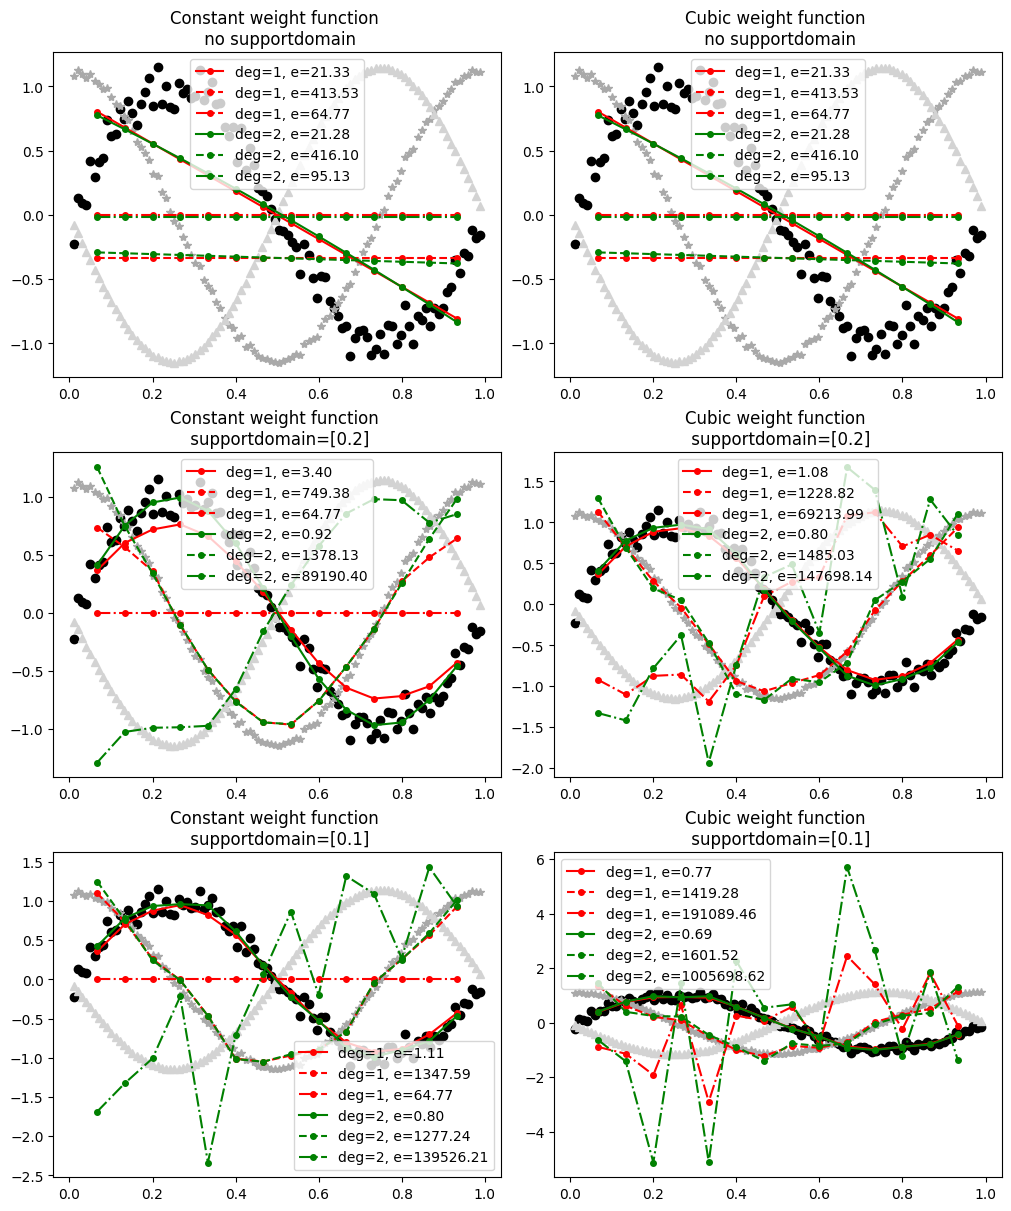

In [12]:
plt.show()